<a href="https://colab.research.google.com/github/khasang12-khmt/L2D/blob/main/l2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Remember to change runtime environment to GPU

/content


In [1]:
!git clone https://github.com/khasang12-khmt/L2D.git

Cloning into 'L2D'...
remote: Enumerating objects: 419, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 419 (delta 43), reused 110 (delta 9), pack-reused 242
Receiving objects: 100% (419/419), 14.54 MiB | 24.50 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [2]:
!ls L2D

agent_utils.py	models			    SavedNetwork
BenchDataNmpy	paper			    test_learned_on_benchmark.py
data		Params.py		    test_learned.py
DataGen		permissibleLS.py	    uniform_instance_gen.py
Dockerfile	plot.py			    updateAdjMat.py
env_lab.py	PPO_jssp_multiInstances.py  updateEntTimeLB.py
JSSP_Env.py	README.md		    validation.py
mb_agg.py	readStats.py


In [3]:
%cd L2D

/content/L2D


In [4]:
!python test_learned_on_benchmark.py

Instance1 makespan: 2592.0
Instance2 makespan: 2715.0
Instance3 makespan: 2431.0
Instance4 makespan: 2712.0
Instance5 makespan: 2651.0
Instance6 makespan: 2852.0
Instance7 makespan: 2502.0
Instance8 makespan: 2525.0
Instance9 makespan: 2497.0
Instance10 makespan: 2507.0


In [ ]:
!python plot.py

In [ ]:
!python readStats.py

In [ ]:
import numpy as np
np.load('/content/L2D/drlResult_tai_30x20_30x20.npy')

array([2592., 2715., 2431., 2712., 2651., 2852., 2502., 2525., 2497.,
       2507.], dtype=float32)

In [72]:
# This may take a long time!!
!python validation.py

1735.81
1715.31
1741.65
1751.07
1734.28
1714.95
Traceback (most recent call last):
  File "validation.py", line 99, in <module>
  File "validation.py", line 34, in validate
    mask=mask_tensor.unsqueeze(0))
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/content/L2D/models/actor_critic.py", line 60, in forward
    adj=adj)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/content/L2D/models/graphcnn_congForSJSSP.py", line 140, in forward
    h = self.next_layer(h, layer, Adj_block=Adj_block)
  File "/content/L2D/models/graphcnn_congForSJSSP.py", line 102, in next_layer
    pooled = torch.mm(Adj_block, h)
KeyboardInterrupt


In [ ]:
x = np.load('/content/L2D/DataGen/generatedData100_20_Seed200.npy')[0][0]
print(x)

[[27 17 69 ...  8 52 28]
 [74 16  2 ... 46 62 21]
 [86  1  4 ... 69 63 53]
 ...
 [67 67 43 ... 24 76  9]
 [89 44 81 ... 36 84 23]
 [46 59 89 ... 49 60 48]]


In [ ]:
f = open("/content/L2D/data/simple_test.txt", "r")
machine_matrix = []
process_time = []
num_jobs, num_machines = 0,0
for i,line in enumerate(f):
    if i==0:
        first_line = line.split()
        num_jobs, num_machines = first_line
    else:
        list = line.split()
        machine_matrix.append([int(i) for i in list][0::2])
        process_time.append([int(i) for i in list][1::2])
machine_matrix = np.array(machine_matrix)
#process_time = np.array(process_time)
print(machine_matrix.astype(np.single))
# for i in range(1):

[[0. 1. 2.]
 [0. 2. 1.]
 [1. 0. 2.]]


In [ ]:
!python test_learned.py

Instance1 makespan: 933.0
Instance2 makespan: 1066.0
Instance3 makespan: 999.0
Instance4 makespan: 1052.0
Instance5 makespan: 993.0
Instance6 makespan: 888.0
Instance7 makespan: 1172.0
Instance8 makespan: 844.0
Instance9 makespan: 1019.0
Instance10 makespan: 907.0
Instance11 makespan: 1011.0
Instance12 makespan: 1181.0
Instance13 makespan: 857.0


In [6]:
!pip install pyjssp

In [8]:
data = np.load('/content/L2D/DataGen/generatedData10_10_Seed200.npy')
print(data[0])

[[[27 17 69 43 56 77 80 90 15 92]
  [58 90 12  7 43 57  2  8 52 28]
  [74 16  2 24 86 25  8 23 55 78]
  [17 71 36 32 33 46 60 46 62 21]
  [86  1  4 56 96 57  4 34 73  1]
  [53 91 62 71 79 77 59 69 63 53]
  [ 7 83 97 28 69 65 90 69 51 95]
  [98 30 89 23  8 34 31 58 98 24]
  [ 6 41 27 66 98 82 72 91  1 46]
  [83 39 38 28 93 44 47 34 46 16]]

 [[10  9  1  3  8  5  2  6  4  7]
  [ 6  4  8  2 10  5  3  9  1  7]
  [ 8  3  4  2  7  5 10  6  9  1]
  [ 2  9  4 10  7  6  1  8  5  3]
  [ 3 10  6  8  9  2  1  7  4  5]
  [ 3  6  7  5 10  9  2  8  1  4]
  [ 8  3 10  6  5  1  4  2  9  7]
  [ 2  9  4  7  3  1 10  6  8  5]
  [ 4  9  1  5  2  6  8 10  3  7]
  [ 7  5  2  4  6  8  9 10  3  1]]]


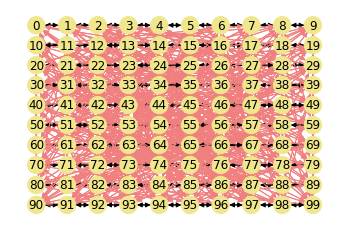

OrderedDiGraph with 100 nodes and 1080 edges -6 False


In [10]:
from pyjssp.simulators import Simulator, NodeProcessingTimeSimulator
from pyjssp.utils import pprint_graph
import numpy as np
import random
s = Simulator(num_machines=data[0][1].shape[0],
                num_jobs=data[0][0].shape[0],
                machine_matrix=data[0][1],
                processing_time_matrix=data[0][0])

s.plot_graph()

s.flush_trivial_ops()

g, r, done = s.observe()
print(g,r,done)

In [ ]:
pip install ganttchart

# Visualize with Gantt Chart (Remember to TURN OFF GPU)

In [ ]:
!git clone https://github.com/khasang12-khmt/L2D.git

Cloning into 'L2D'...
remote: Enumerating objects: 419, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 419 (delta 43), reused 110 (delta 9), pack-reused 242
Receiving objects: 100% (419/419), 14.54 MiB | 7.45 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))
from pyomo.environ import *
from pyomo.gdp import *

     |████████████████████████████████| 9.6 MB 4.9 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unp

In [ ]:
def jobshop_model(TASKS):
    
    model = ConcreteModel()

    # tasks is a two dimensional set of (j,m) constructed from the dictionary keys
    model.TASKS = Set(initialize = TASKS.keys(), dimen=2)
    
    # the set of jobs is constructed from a python set
    model.JOBS = Set(initialize = list(set([j for (j,m) in model.TASKS])))
    
    # set of machines is constructed from a python set
    model.MACHINES = Set(initialize = list(set([m for (j,m) in model.TASKS])))
    
    # the order of tasks is constructed as a cross-product of tasks and filtering
    model.TASKORDER = Set(initialize = model.TASKS * model.TASKS, dimen=4, 
        filter = lambda model, j, m, k, n: (k,n) == TASKS[(j,m)]['prec'])
    
    # the set of disjunctions is cross-product of jobs, jobs, and machines
    model.DISJUNCTIONS = Set(initialize = model.JOBS * model.JOBS * model.MACHINES, dimen=3,
        filter = lambda model, j, k, m: j < k and (j,m) in model.TASKS and (k,m) in model.TASKS)
    
    # load duration data into a model parameter for later access
    model.dur = Param(model.TASKS, initialize=lambda model, j, m: TASKS[(j,m)]['dur'])

    # establish an upper bound on makespan
    ub = sum([model.dur[j, m] for (j,m) in model.TASKS])
    
    # create decision variables
    model.makespan = Var(bounds=(0, ub))
    model.start = Var(model.TASKS, bounds=(0, ub))
    
    model.objective = Objective(expr = model.makespan, sense = minimize)

    model.finish = Constraint(model.TASKS, rule=lambda model, j, m:  
        model.start[j,m] + model.dur[j,m] <= model.makespan)
    
    model.preceding = Constraint(model.TASKORDER, rule=lambda model, j, m, k, n: 
        model.start[k,n] + model.dur[k,n] <= model.start[j,m])
    
    model.disjunctions = Disjunction(model.DISJUNCTIONS, rule=lambda model,j,k,m:
        [model.start[j,m] + model.dur[j,m] <= model.start[k,m], 
         model.start[k,m] + model.dur[k,m] <= model.start[j,m]])
    
    TransformationFactory('gdp.hull').apply_to(model)
    return model


def visualize(results):
    
    schedule = pd.DataFrame(results)
    JOBS = sorted(list(schedule['Job'].unique()))
    MACHINES = sorted(list(schedule['Machine'].unique()))
    makespan = schedule['Finish'].max()
    
    bar_style = {'alpha':1.0, 'lw':25, 'solid_capstyle':'butt'}
    text_style = {'color':'white', 'weight':'bold', 'ha':'center', 'va':'center'}
    colors = mpl.cm.Dark2.colors

    schedule.sort_values(by=['Job', 'Start'])
    schedule.set_index(['Job', 'Machine'], inplace=True)

    fig, ax = plt.subplots(2,1, figsize=(12, 5+(len(JOBS)+len(MACHINES))/4))

    for jdx, j in enumerate(JOBS, 1):
        for mdx, m in enumerate(MACHINES, 1):
            if (j,m) in schedule.index:
                xs = schedule.loc[(j,m), 'Start']
                xf = schedule.loc[(j,m), 'Finish']
                ax[0].plot([xs, xf], [jdx]*2, c=colors[mdx%7], **bar_style)
                ax[0].text((xs + xf)/2, jdx, m, **text_style)
                ax[1].plot([xs, xf], [mdx]*2, c=colors[jdx%7], **bar_style)
                ax[1].text((xs + xf)/2, mdx, j, **text_style)
                
    ax[0].set_title('Job Schedule')
    ax[0].set_ylabel('Job')
    ax[1].set_title('Machine Schedule')
    ax[1].set_ylabel('Machine')
    
    for idx, s in enumerate([JOBS, MACHINES]):
        ax[idx].set_ylim(0.5, len(s) + 0.5)
        ax[idx].set_yticks(range(1, 1 + len(s)))
        ax[idx].set_yticklabels(s)
        ax[idx].text(makespan, ax[idx].get_ylim()[0]-0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
        ax[idx].plot([makespan]*2, ax[idx].get_ylim(), 'r--')
        ax[idx].set_xlabel('Time')
        ax[idx].grid(True)
        
    fig.tight_layout()

def recipe_to_tasks(jobs, machines, durations):
    TASKS = {}
    for j in jobs:
        prec = (None,None)
        for m,d in zip(machines,durations):
            task = (j,m)
            if prec == (None,None):
                TASKS.update({(j,m): {'dur': d, 'prec': None}})
            else:
                TASKS.update({(j,m): {'dur': d, 'prec': prec}})
            prec = task
    return TASKS

def jobshop_solve(model):
    SolverFactory('cbc').solve(model)
    results = [{'Job': j,
                'Machine': m,
                'Start': model.start[j, m](), 
                'Duration': model.dur[j,m], 
                'Finish': model.start[(j, m)]() + model.dur[j,m]}
               for j,m in model.TASKS]
    return results

def jobshop(TASKS):
    return jobshop_solve(jobshop_model(TASKS))

Makespan = 26.5


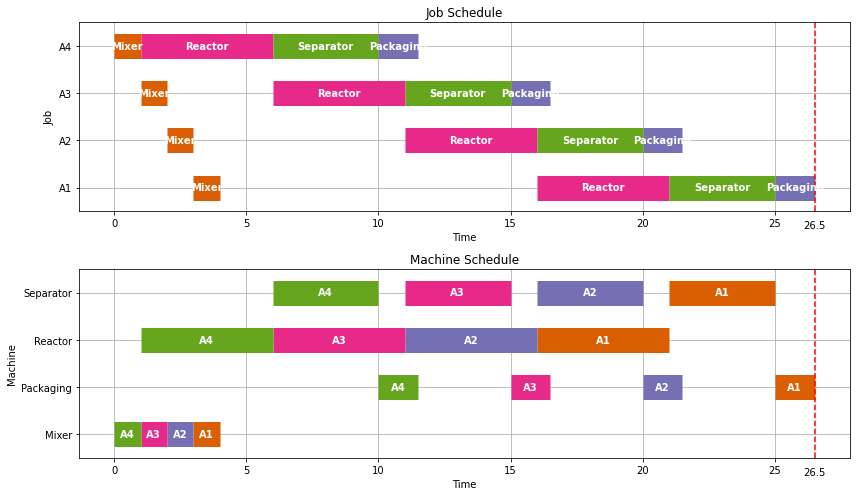

In [ ]:
TASKS = recipe_to_tasks(['A1','A2','A3', 'A4'],['Mixer','Reactor','Separator','Packaging'],[1,5,4,1.5])
results = jobshop(TASKS)
visualize(results)
print("Makespan =", max([task['Finish'] for task in results]))

Makespan = 448.0


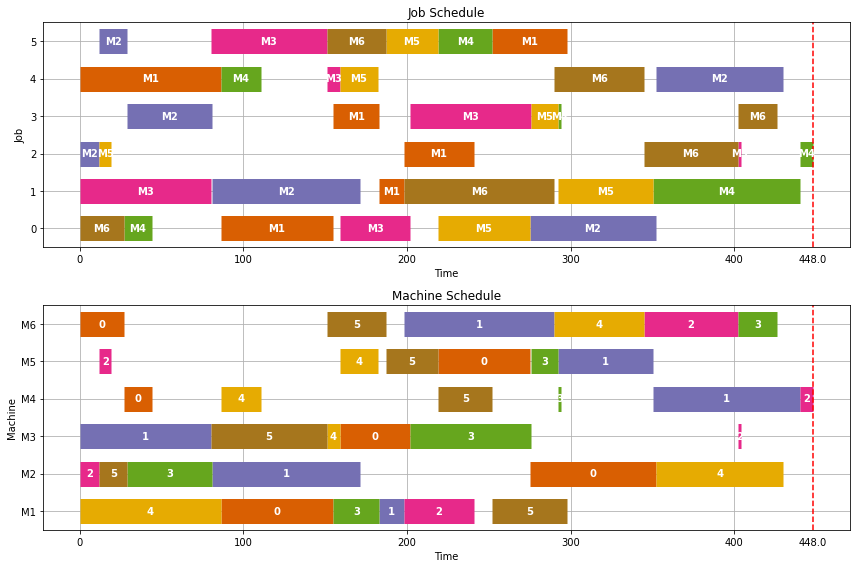

In [ ]:
import numpy as np
data = np.load('/content/L2D/DataGen/generatedData6_6_Seed200.npy')
num_M = data[0][0].shape[0]
num_J = data[0][1].shape[0]

for i in range(num_J):
  if i==0:
    TASKs = recipe_to_tasks(str(i),['M'+str(y) for y in data[0][1][i]],data[0][0][i].tolist())
  else:
    TASKs.update(recipe_to_tasks(str(i),['M'+str(y) for y in data[0][1][i]],data[0][0][i].tolist()))
results = jobshop(TASKs)
visualize(results)
print("Makespan =", max([task['Finish'] for task in results]))
#print(TASKs)

# One-Test

In [12]:
!touch one_test.py

In [30]:
inp = np.load('/content/L2D/BenchDataNmpy/dmu20x15.npy')
print(inp[0])

[[[160   5 139  99   9  98  28 107 196 165 114   7  34 133  76]
  [105 160  19 189  25  95  15 122 165   2  66 111  51  83 183]
  [ 61  11 130 147 106   1 141 136  33  13  15  10  62   4 142]
  [117  11 162 192  35 172   4 193 141 139  62  12   1 135  25]
  [ 53  89 168  41 121 181  43 118  61 193 124 176  28 125 136]
  [152 115 122   5  46 144  29 176 115  18  23  26 175 110  75]
  [ 50  62 186  57 156  32 134 141 189 118 102   3 177  43  41]
  [ 35 171 160  32   5 154 195 113 162 152 140  72  16 104 171]
  [ 68  54 116   9  99 155  22 135  67 165 100  47  46  55  12]
  [135 105  49   4 176  52 128 188 170 170 169  62 120  28  70]
  [ 93 172 124  72 189 122  38 120 114  51  77  65 176 171 169]
  [122  21   6 189  75   5 180 160  14  73  45  61 148  96 194]
  [ 94 198 100 194 127  95  43  52 166  31 100 104 166 139 143]
  [  4  78 199 119 167  54  38 114  10 115 101 104  61  75 175]
  [ 18 115 166  41 124 101  38  29  91 118  40  55  82  89 100]
  [  2 107  99 152  51  13 112  96 150  

In [38]:
inp = np.load('/content/L2D/DataGen/generatedData6_6_Seed200.npy')
print(inp[0])

[[[27 17 69 43 56 77]
  [80 90 15 92 58 90]
  [12  7 43 57  2  8]
  [52 28 74 16  2 24]
  [86 25  8 23 55 78]
  [17 71 36 32 33 46]]

 [[ 6  4  1  3  5  2]
  [ 3  2  1  6  5  4]
  [ 2  5  1  6  3  4]
  [ 2  1  3  5  4  6]
  [ 1  4  3  5  6  2]
  [ 2  3  6  5  4  1]]]


In [69]:
!python one_test.py

Makespan: 933.0
0.2826058864593506


In [28]:
res = np.load('/content/L2D/drlResult_6x6_6x6_Seed200.npy')
print(res)

[539.]


# Google Or-Tools

In [ ]:
!pip install ortools

In [73]:
inp = np.load('/content/L2D/DataGen/Vali/generatedData20_15_Seed200.npy')
print(inp[0])

[[[27 17 69 43 56 77 80 90 15 92 58 90 12  7 43]
  [57  2  8 52 28 74 16  2 24 86 25  8 23 55 78]
  [17 71 36 32 33 46 60 46 62 21 86  1  4 56 96]
  [57  4 34 73  1 53 91 62 71 79 77 59 69 63 53]
  [ 7 83 97 28 69 65 90 69 51 95 98 30 89 23  8]
  [34 31 58 98 24  6 41 27 66 98 82 72 91  1 46]
  [83 39 38 28 93 44 47 34 46 16 82 30 73 65 28]
  [72 30 33 64 44 88 26 66 96 85 34 22 13 43 46]
  [16 56 51 97 16 62 43 10 75 88 49 38 91 69 43]
  [71  7 94 47 96 61  8  1 17 73 32 29 84 85  9]
  [82 77 16 94 66 89 65 94  3 68  5 62 63 60 77]
  [25 78 18 31 78 91 53  4 31 68 17 85 48 35 43]
  [11 58 54 22 89 16 89 31 53 14  3 34 28 75 64]
  [86 64 25 96 22 43  5 64 78 31 93 28 37 55 76]
  [44  8 43 25 37 37 16 81 24 83 73 27 58 33 84]
  [70 57 92 82 28 70 43 90 58 84  3 40 58 45 73]
  [20 89 43 67  6 85 66 26 94 91 16 34 67 75 19]
  [21 60 10 25 12 81 11 57 61 38 56 61 70 70 80]
  [52 28  1 78 64 41 21 85 71 67 50 12 35 66 49]
  [65 45 80 78 74  9 83 44 95  6 97 87 86 41 89]]

 [[ 7 10  6  2 15 

In [74]:
"""Minimal jobshop example."""
import collections
from ortools.sat.python import cp_model


def main():
    """Minimal jobshop problem."""
    # Data.
    _, jobs, machines = inp[0].shape
    jobs_data = []
    for row in range(jobs):
      lst = []
      for col in range(machines):
        lst.append((inp[0][1][row][col],inp[0][0][row][col]))
      jobs_data.append(lst)
    # jobs_data = [  # task = (machine_id, processing_time).
    #     [(0, 3), (1, 2), (2, 2)],  # Job0
    #     [(0, 2), (2, 1), (1, 4)],  # Job1
    #     [(1, 4), (2, 3)]  # Job2
    # ]

    machines_count = max(task[0] for job in jobs_data for task in job)
    all_machines = range(machines_count)
    # Computes horizon dynamically as the sum of all durations.
    horizon = sum(task[1] for job in jobs_data for task in job)

    # Create the model.
    model = cp_model.CpModel()

    # Named tuple to store information about created variables.
    task_type = collections.namedtuple('task_type', 'start end interval')
    # Named tuple to manipulate solution information.
    assigned_task_type = collections.namedtuple('assigned_task_type',
                                                'start job index duration')

    # Creates job intervals and add to the corresponding machine lists.
    all_tasks = {}
    machine_to_intervals = collections.defaultdict(list)

    for job_id, job in enumerate(jobs_data):
        for task_id, task in enumerate(job):
            machine = task[0]
            duration = task[1]
            suffix = '_%i_%i' % (job_id, task_id)
            start_var = model.NewIntVar(0, horizon, 'start' + suffix)
            end_var = model.NewIntVar(0, horizon, 'end' + suffix)
            interval_var = model.NewIntervalVar(start_var, duration, end_var,
                                                'interval' + suffix)
            all_tasks[job_id, task_id] = task_type(start=start_var,
                                                   end=end_var,
                                                   interval=interval_var)
            machine_to_intervals[machine].append(interval_var)

    # Create and add disjunctive constraints.
    for machine in all_machines:
        model.AddNoOverlap(machine_to_intervals[machine])

    # Precedences inside a job.
    for job_id, job in enumerate(jobs_data):
        for task_id in range(len(job) - 1):
            model.Add(all_tasks[job_id, task_id +
                                1].start >= all_tasks[job_id, task_id].end)

    # Makespan objective.
    obj_var = model.NewIntVar(0, horizon, 'makespan')
    model.AddMaxEquality(obj_var, [
        all_tasks[job_id, len(job) - 1].end
        for job_id, job in enumerate(jobs_data)
    ])
    model.Minimize(obj_var)

    # Creates the solver and solve.
    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print('Solution:')
        # Create one list of assigned tasks per machine.
        assigned_jobs = collections.defaultdict(list)
        for job_id, job in enumerate(jobs_data):
            for task_id, task in enumerate(job):
                machine = task[0]
                assigned_jobs[machine].append(
                    assigned_task_type(start=solver.Value(
                        all_tasks[job_id, task_id].start),
                                       job=job_id,
                                       index=task_id,
                                       duration=task[1]))

        # Create per machine output lines.
        output = ''
        for machine in all_machines:
            # Sort by starting time.
            assigned_jobs[machine].sort()
            sol_line_tasks = 'Machine ' + str(machine) + ': '
            sol_line = '           '

            for assigned_task in assigned_jobs[machine]:
                name = 'job_%i_task_%i' % (assigned_task.job,
                                           assigned_task.index)
                # Add spaces to output to align columns.
                sol_line_tasks += '%-15s' % name

                start = assigned_task.start
                duration = assigned_task.duration
                sol_tmp = '[%i,%i]' % (start, start + duration)
                # Add spaces to output to align columns.
                sol_line += '%-15s' % sol_tmp

            sol_line += '\n'
            sol_line_tasks += '\n'
            output += sol_line_tasks
            output += sol_line

        # Finally print the solution found.
        print(f'Optimal Schedule Length: {solver.ObjectiveValue()}')
        print(output)
    else:
        print('No solution found.')

    # Statistics.
    print('\nStatistics')
    print('  - conflicts: %i' % solver.NumConflicts())
    print('  - branches : %i' % solver.NumBranches())
    print('  - wall time: %f s' % solver.WallTime())


if __name__ == '__main__':
    main()

Solution:
Optimal Schedule Length: 1482.0
Machine 0: 
           
Machine 1: job_12_task_0  job_17_task_1  job_6_task_1   job_14_task_4  job_2_task_6   job_15_task_4  job_4_task_6   job_13_task_4  job_10_task_5  job_8_task_6   job_3_task_6   job_7_task_10  job_11_task_9  job_0_task_9   job_19_task_11 job_5_task_10  job_18_task_11 job_9_task_10  job_16_task_12 job_1_task_14  
           [0,11]         [21,81]        [83,122]       [134,171]      [294,354]      [397,425]      [425,515]      [537,559]      [559,648]      [648,691]      [711,802]      [820,854]      [855,923]      [952,1044]     [1061,1148]    [1148,1230]    [1230,1242]    [1242,1274]    [1306,1373]    [1373,1451]    
Machine 2: job_2_task_1   job_16_task_2  job_12_task_3  job_0_task_3   job_11_task_3  job_14_task_8  job_19_task_3  job_7_task_6   job_17_task_11 job_15_task_8  job_8_task_7   job_13_task_8  job_1_task_8   job_5_task_5   job_6_task_7   job_18_task_10 job_10_task_13 job_3_task_11  job_4_task_13  job_9_task_13 